In [13]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.tree import plot_tree

In [14]:
df = pd.read_csv('output.csv')

In [15]:
test = pd.read_csv('test.tsv',sep='\t')

In [16]:
test.head()

,5,55666,80,237,"['0.0019104185', '0.3510220508', '0.3510266765', '0.0000092514', '0.0055323499', '0.0070588344', '0.0048107390', '0.0069848230', '0.0071143429', '0.0069663202', '0.0015912445', '0.3511793249', '0.3514522419', '0.0069755716', '0.0042972852', '0.0069801973']"
0,13,25,60224,101,"['0.0004671968', '0.0015079817', '0.0003423026..."
1,6,23832,80,14310,"['0.0019104185', '0.0076555511', '0.3536309516..."
2,13,25,63850,240,"['0.0005273310', '0.0008650079', '0.0033073831..."
3,7,57292,80,541,"['0.0019104185', '0.4181919947', '0.4181966205..."
4,11,59504,80,206,"['0.0019150442', '0.6299246472', '0.0073548799..."


In [17]:
df.columns  = ['category', 'sourcePort', 'destinationPort', 'packetSize', 'word_vector','label']
test.columns  = ['category', 'sourcePort', 'destinationPort', 'packetSize', 'word_vector']

In [18]:
df.head()

,category,sourcePort,destinationPort,packetSize,word_vector,label
0,11,25,7091,265,"['0.0023359839', '0.0030298405', '0.0013183275...",2
1,7,50687,80,752,"['0.0097093666', '0.0019104185', '0.4181919947...",1
2,14,4889,443,380,"['0.0285082546', '0.0136412206', '0.0094225725...",2
3,6,40548,80,3054,"['0.0019104185', '0.0076555511', '0.3536309516...",2
4,14,4996,8080,446,"['0.0019104185', '0.9232409579', '0.0000092514...",2


In [19]:
# function to calculate average

df['word_vector'] = df['word_vector'].apply(lambda x: ast.literal_eval(x))
def convert_to_float_list(word_vector):
    return np.array([float(value) for value in word_vector])

def compute_average_word_vector(word_vector):
    word_vector = convert_to_float_list(word_vector)
    return np.mean(word_vector, axis=0)

df['word_vector'] = df['word_vector'].apply(compute_average_word_vector)
df['label'] = df['label'].replace({1: 0, 2: 1})

In [20]:
test['word_vector'] = test['word_vector'].apply(lambda x: ast.literal_eval(x))
def convert_to_float_list(word_vector):
    return np.array([float(value) for value in word_vector])

def compute_average_word_vector(word_vector):
    word_vector = convert_to_float_list(word_vector)
    return np.mean(word_vector, axis=0)

test['word_vector'] = test['word_vector'].apply(compute_average_word_vector)

In [21]:
# df = df.iloc[:, 1:]
df.head()

,category,sourcePort,destinationPort,packetSize,word_vector,label
0,11,25,7091,265,0.296794,1
1,7,50687,80,752,0.117695,0
2,14,4889,443,380,0.249698,1
3,6,40548,80,3054,0.116836,1
4,14,4996,8080,446,0.064109,1


In [22]:
X = df.drop('label', axis=1)
y = df['label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

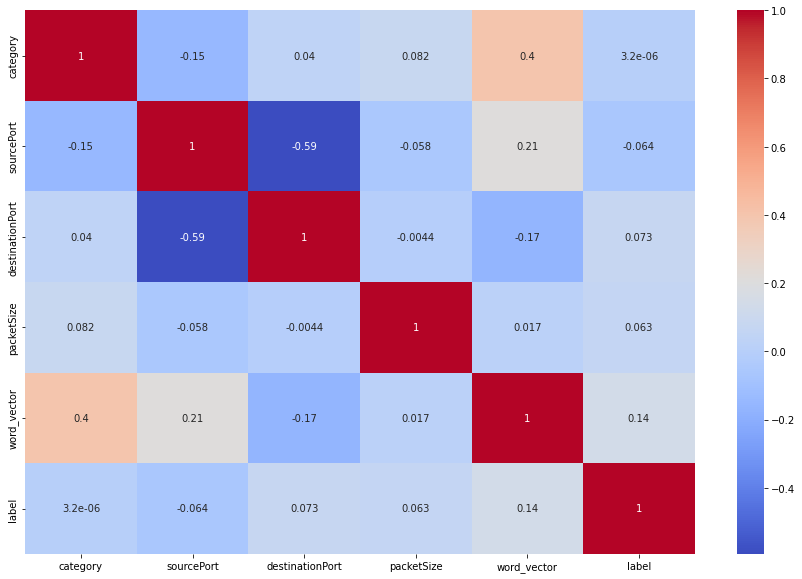

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [25]:
random_forest = RandomForestClassifier(n_estimators=200,min_samples_leaf=1,max_depth=10,min_samples_split=5,random_state=42)
# random_forest = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [150,200,300],
#     'max_depth': [None,5,10],
#     'min_samples_split': [1,3,5],
#     'min_samples_leaf': [1,3,5]
# }

In [26]:
# implementing a grid search
random_forest.fit(X_train, y_train)

# grid_search = GridSearchCV(random_forest, param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [27]:
y_pred = random_forest.predict(X_test)

In [65]:
# pd.DataFrame(y_pred).to_csv('result1.csv',index=False,header=False)

In [28]:
# evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9683192625775328
Confusion Matrix:
[[22215   887]
 [  584 22746]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     23102
           1       0.96      0.97      0.97     23330

    accuracy                           0.97     46432
   macro avg       0.97      0.97      0.97     46432
weighted avg       0.97      0.97      0.97     46432



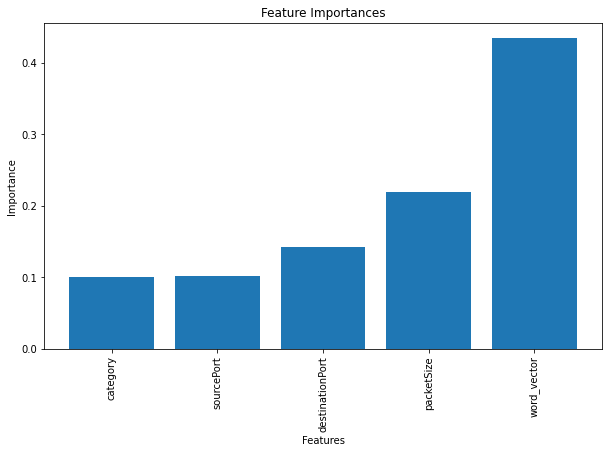

In [51]:
feature_names = X_train.columns.tolist()
feature_importances = random_forest.feature_importances_

plt.figure(figsize=(10, 6))
num_features = X_train.shape[1]

plt.bar(range(len(feature_importances)), feature_importances, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

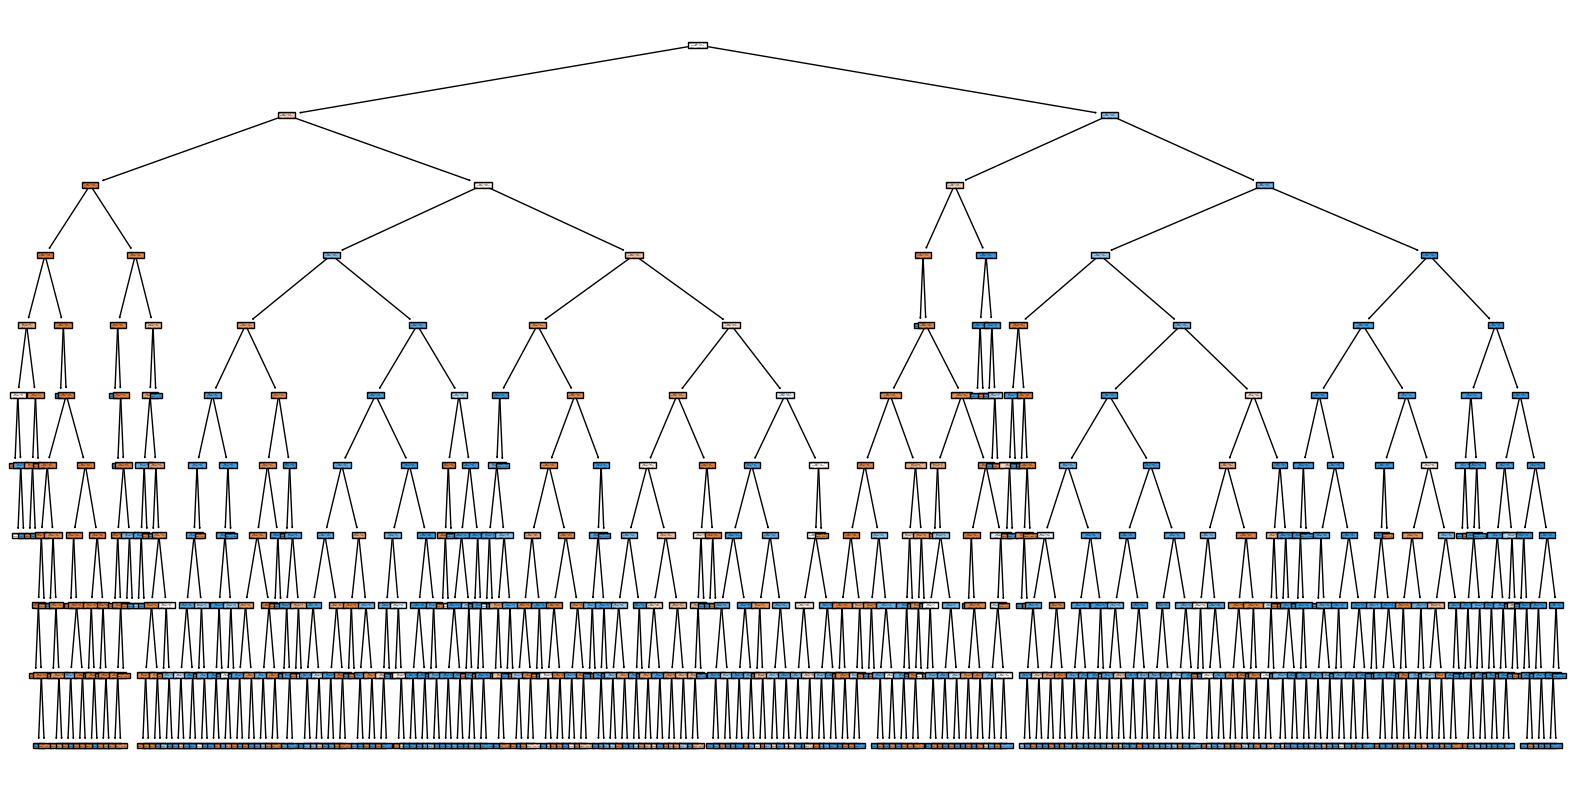

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_model.estimators_[0], feature_names=feature_names, filled=True)
plt.show()

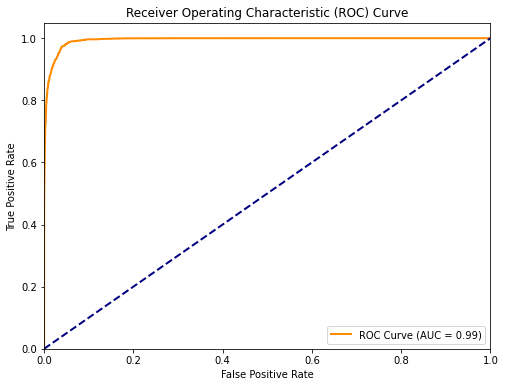

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your Random Forest classifier as 'rf_classifier'
# and you have predictions on the test set as 'y_pred_probabilities'

# Calculate the ROC curve
y_pred_probabilities = random_forest.predict_proba(X_test)[:, 1]  # Probability of class 1

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred_probabilities)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
results = pd.read_csv('updated_result1.csv')
results.shape

(58060, 1)